In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('carMPG.csv',sep=',',index_col=None)

df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model_year,Origin,Car_Name
0,8.0,8,307.0,130,3504,12.0,2015,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,2015,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,2015,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,2015,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,2015,1,ford torino


In [3]:
df.dtypes

MPG             float64
Cylinders         int64
Displacement    float64
Horsepower       object
Weight            int64
Acceleration    float64
Model_year        int64
Origin            int64
Car_Name         object
dtype: object

In [4]:
df.describe()


,MPG,Cylinders,Displacement,Weight,Acceleration,Model_year,Origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.489447,5.454774,193.425879,2970.424623,15.568090,2008.989950,1.572864
std,7.849757,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,8.000000,3.000000,68.000000,1613.000000,8.000000,2003.000000,1.000000
25%,17.125000,4.000000,104.250000,2223.750000,13.825000,2006.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,2009.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,2012.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,2015.000000,3.000000


In [6]:
# Load the data
model = pd.DataFrame(df, columns = ['MPG', 'Acceleration'])

model

,MPG,Acceleration
0,8.0,12.0
1,15.0,11.5
2,18.0,11.0
3,16.0,12.0
4,17.0,10.5
5,15.0,10.0
6,14.0,9.0
7,14.0,8.5
8,14.0,10.0
9,15.0,8.5


In [7]:
model.dtypes

MPG             float64
Acceleration    float64
dtype: object

In [8]:
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 2]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

In [9]:
def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 2]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

In [10]:
def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, points, learning_rate)
    return [b, m]


In [11]:
points = model

points[:10]



,MPG,Acceleration
0,8.0,12.0
1,15.0,11.5
2,18.0,11.0
3,16.0,12.0
4,17.0,10.5
5,15.0,10.0
6,14.0,9.0
7,14.0,8.5
8,14.0,10.0
9,15.0,8.5


In [12]:
len(points)

398

In [13]:
points=points.reset_index().values

In [14]:
points[:10]

array([[  0. ,   8. ,  12. ],
       [  1. ,  15. ,  11.5],
       [  2. ,  18. ,  11. ],
       [  3. ,  16. ,  12. ],
       [  4. ,  17. ,  10.5],
       [  5. ,  15. ,  10. ],
       [  6. ,  14. ,   9. ],
       [  7. ,  14. ,   8.5],
       [  8. ,  14. ,  10. ],
       [  9. ,  15. ,   8.5]])

In [15]:
# Initialize the hyper parameters
learning_rate = 0.0001
initial_b = 0 # initial y-intercept guess
initial_m = 0 # initial slope guess
num_iterations = 1000

In [16]:
points[1,1]

15.0

In [17]:
#Call function
print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b,initial_m,compute_error_for_line_given_points(initial_b, initial_m, points)))


Starting gradient descent at b = 0, m = 0, error = 613.2179899497488


In [18]:
[b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
   

In [19]:
 print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))

After 1000 iterations b = 0.1211874783663623, m = 1.4920263083109613, error = 51.13854646383735


In [20]:
points[1]

array([  1. ,  15. ,  11.5])

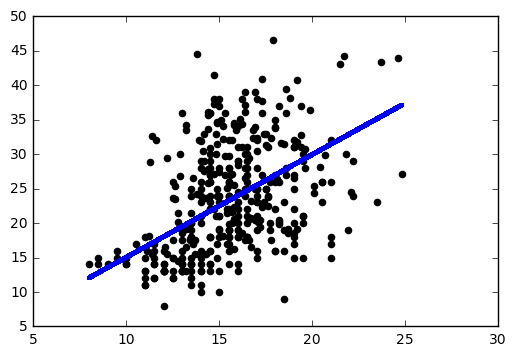

In [21]:
# Plot outputs
for i in range(0, len(points)):
        x = points[i, 2]
        y = points[i, 1]
        plt.scatter(x,y,color='black')

        plt.plot(model.Acceleration, (1.4920263083109613 * model.Acceleration + 0.1211874783663623), color='blue',linewidth=3)

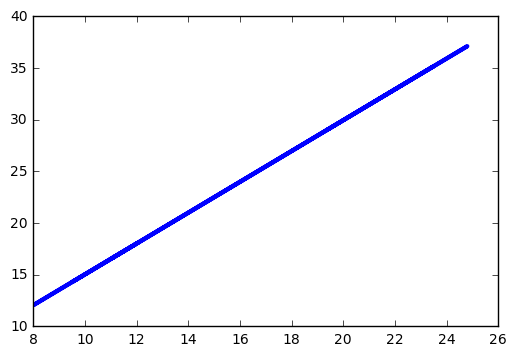

In [36]:
plt.plot(model.Acceleration, (1.4920263083109613 * model.Acceleration + 0.1211874783663623), color='blue',linewidth=3)